<div class="alert alert-block alert-info" style="margin-top: 20px">


<div
style = "text-align: center; font-size: 24px; color: red";>
<h1> <b> SDT 100 01 </b> </h1>
</div>

<div
style = "text-align: center; font-size: 24px; color: red";>
<h4> <i> Lecture 9c: Data Data Visualization using Plotly </i> </h4>
</div>

<div
style = "text-align: center; font-size: 24px; color: blue";>
<h6> November 15, 2025 </h6>
</div>

<br>

<div
style = "text-align: center; font-size: 24px; color: green";>
<h6> Mirwais Parsa | Seton Hill University </h6>
</div>

<br>



</div>

# 1. Plotly

#### Plotly is a powerful, open-source Python library for creating interactive, publication ready visualizations. Unlike static plotting libraries, Plotly creates dynamic, interactive charts that allow users to hover for information, zoom, and export data. In this lecture we covers main concepts and a practical applications of plotly visualization in business intelligence and scientific research.


## 2. Package Structure of Plotly

Plotly provides two major Python modules:

### 2.1 `plotly.express`
- High-level
- Fast figure creation from DataFrames
- Best for quick exploratory analysis
- Internally calls `graph_objects`


### 2.2 `plotly.graph_objects`
- Is the low-level module in Plotly.
- Provides full control over figure construction.
- Figures are made of traces, layout, and optionally frames for animations.
- Each trace represents a single plot element (scatter, bar, pie, etc.).
- Layout defines axes, titles, colors, legends, and overall styling.
- Best for complex, publication-quality visualizations
- Outputs a `go.Figure`

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels

## 3. Plotly Express

Lets keep working with the sales Datasets across the US states

In [4]:
df = pd.read_excel('Data/Visualization2_US_Data.xlsx')
df.head()

Date          State        Country       City Product Category  \
0 2023-11-22        Georgia  United States     Dallas  Office Supplies   
1 2023-12-22        Florida  United States   San Jose      Electronics   
2 2025-01-27     Washington  United States   Columbus      Electronics   
3 2025-07-14  Massachusetts  United States     Dallas      Electronics   
4 2024-02-15     New Jersey  United States  Charlotte      Electronics   

  Product Name    Sales  Quantity Sold  Profit  Discount %  ... Target Sales  \
0      Stapler  1599.21              7 -239.90       13.78  ...      1546.02   
1       Tablet   198.19              2  -21.46        9.13  ...       199.17   
2   Smartphone   328.66             10   94.29        6.98  ...       301.75   
3   Smartphone   654.90              7 -109.68       28.47  ...       715.89   
4       Tablet  5171.99             15  543.05       25.00  ...      4834.12   

  Unit Price  Revenue  Expenditure_Production  Expenditure_Marketing  \
0     228.46  1718.33                  621.31                 320.52   
1      99.10   236.84                  110.72                  37.96   
2      32.87   366.33                  154.92                  63.28   
3      93.56   818.24                  340.58                  91.25   
4     344.80  6444.07                 2260.11                1023.40   

   Expenditure_Operations  Profits  log_sales  StateCode  Year  
0                  144.02   632.48        NaN         GA  2023  
1                   14.40    73.76        NaN         FL  2023  
2                   27.93   120.20        NaN         WA  2025  
3                  109.55   276.86        NaN         MA  2025  
4                  343.03  2817.53        NaN         NJ  2024  

[5 rows x 23 columns]

### 3.1 Pie Chart

In [148]:
fig = px.pie(df, values='Sales', names = 'State')
fig.show()

Lets add a title and make the chart a little larger

In [149]:
fig = px.pie(
    df,
    values="Sales",
    names="State",
    title="Sales Distribution by State",
    width=800,     
    height=900,   
)
fig.show()

Increase the font size of the title

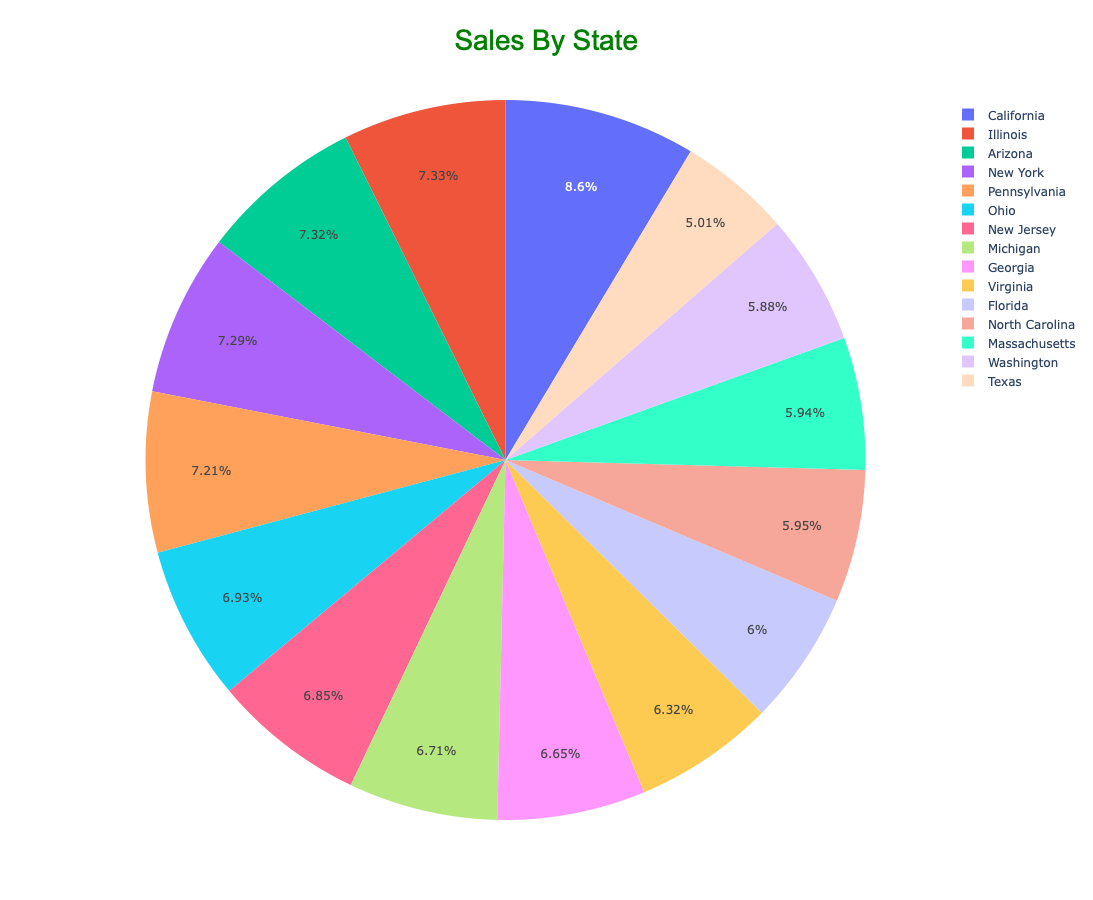

In [150]:
fig.update_layout(
    title=dict(
        text="Sales Distribution by State",
        font=dict(
            size=28,
            family="Arial",
            color="Green"
        ),
        x=0.5,           # centers horizontally
        xanchor='center' # anchors the title at center
    )
)

fig.show()

Lets pull out the slice of Pennsylvania a little bit to hightlight sales in this and also add labels to each slice

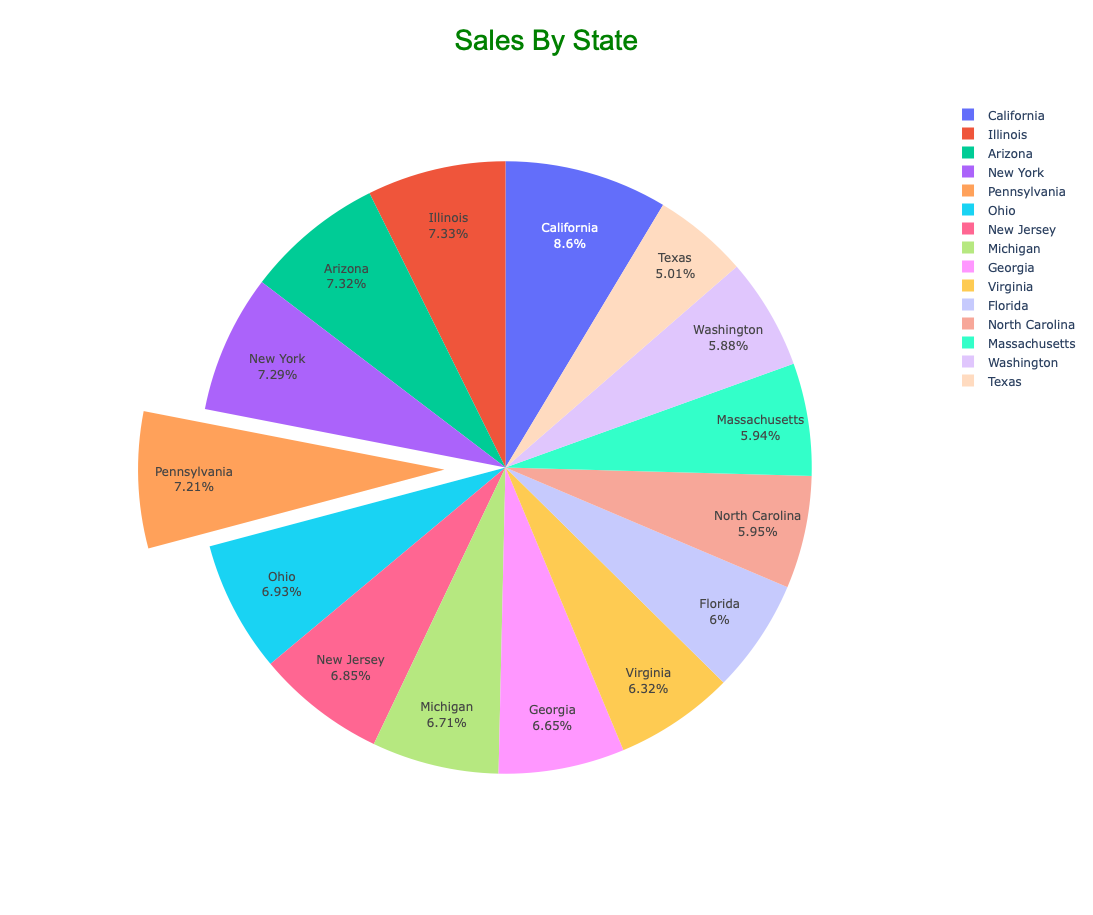

In [151]:
# Create a pull list: 0 for all states, 0.1 for Texas
pull_values = [0.2 if state == "Pennsylvania" else 0 for state in df["State"]]

fig.update_traces(
    pull=pull_values,
    textinfo="label+percent",
)

fig.show()

### 3.2 Donut Chart

What is the profits distribution by state? Plot a Donut figure and highlight Texas

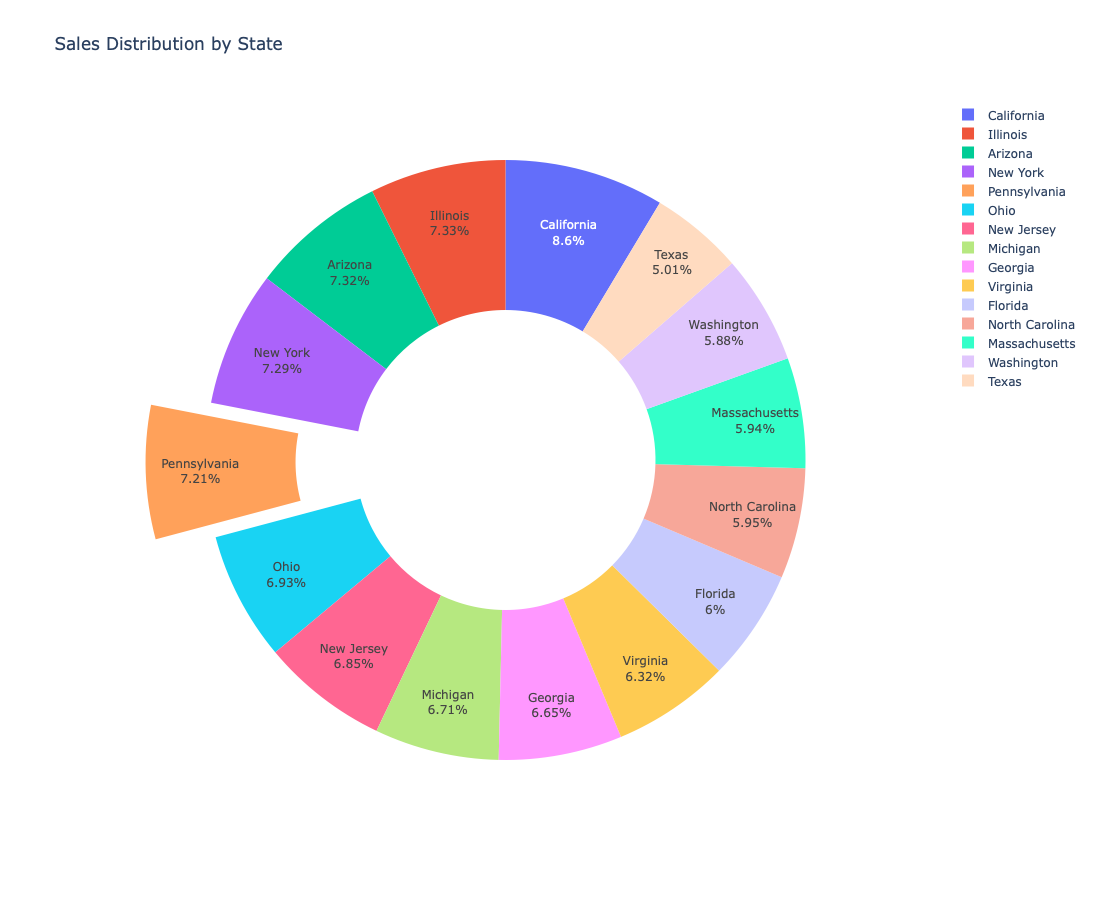

In [191]:
fig = px.pie(
    df,
    values="Sales",
    names="State",
    title="Sales Distribution by State",
    hole=0.5,  
    width=800,
    height=900,
)

pull_values = [0.2 if state == "Pennsylvania" else 0 for state in df["State"]]

fig.update_traces(
    pull=pull_values,
    textinfo="label+percent",
)

fig.show()


## Sunburst Chart

Similar to a pie chart but has the capability of displaying data with multiple levels of categories. It represents hierarchical relationships by splitting a circle into segments:

- Center of the circle: top-level category
- Outer rings: successive subcategories in the hierarchy
- Segment size: usually represents a numeric value like sales, revenue, or count
- Color: can be used to indicate another numeric measure (e.g., profit, growth, or performance)

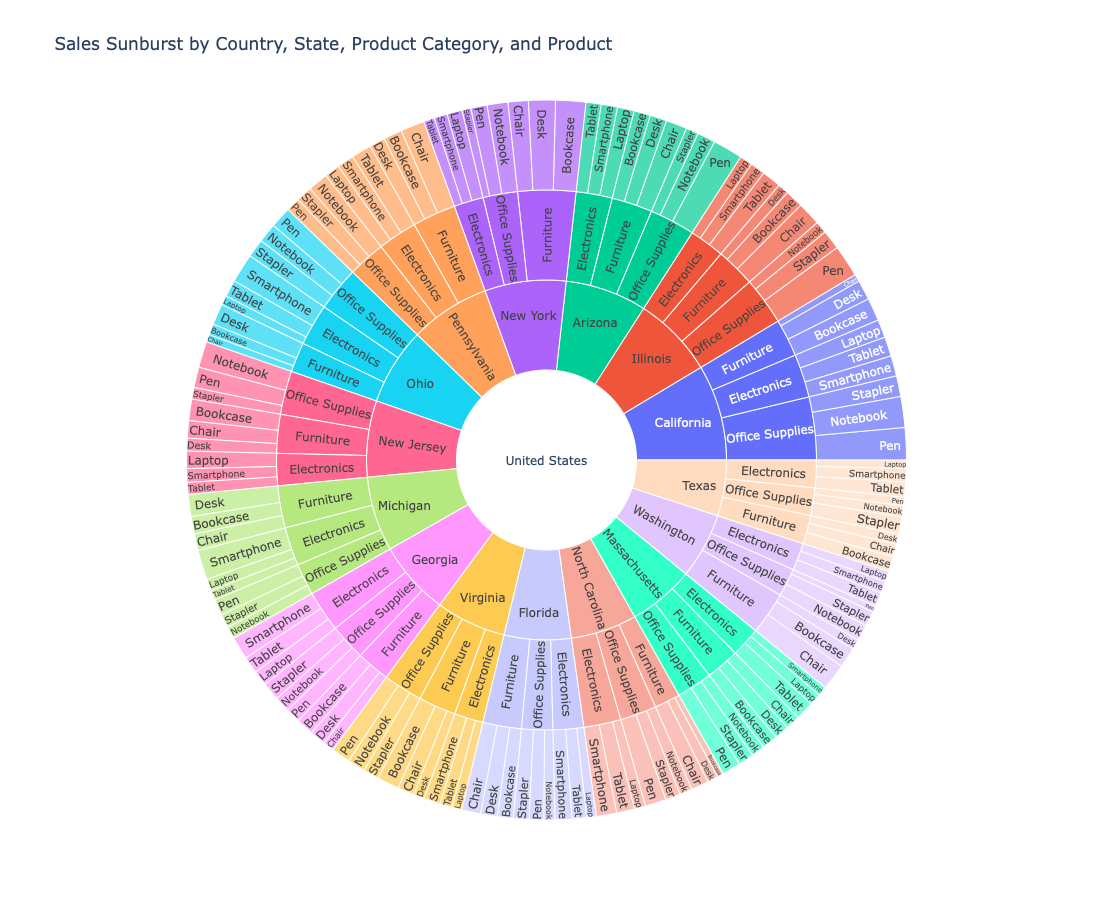

In [265]:
fig = px.sunburst(
    df,
    path=['Country', 'State', 'Product Category', 'Product Name'],
    values='Sales',   
    title='Sales Sunburst by Country, State, Product Category, and Product',
    width = 900,
    height =900
)

fig.show()

We can add another variable as colors. Now. each segment’s size corresponds to total Sales for that node whereas colors represent profits: dark red losses to dark blue profits

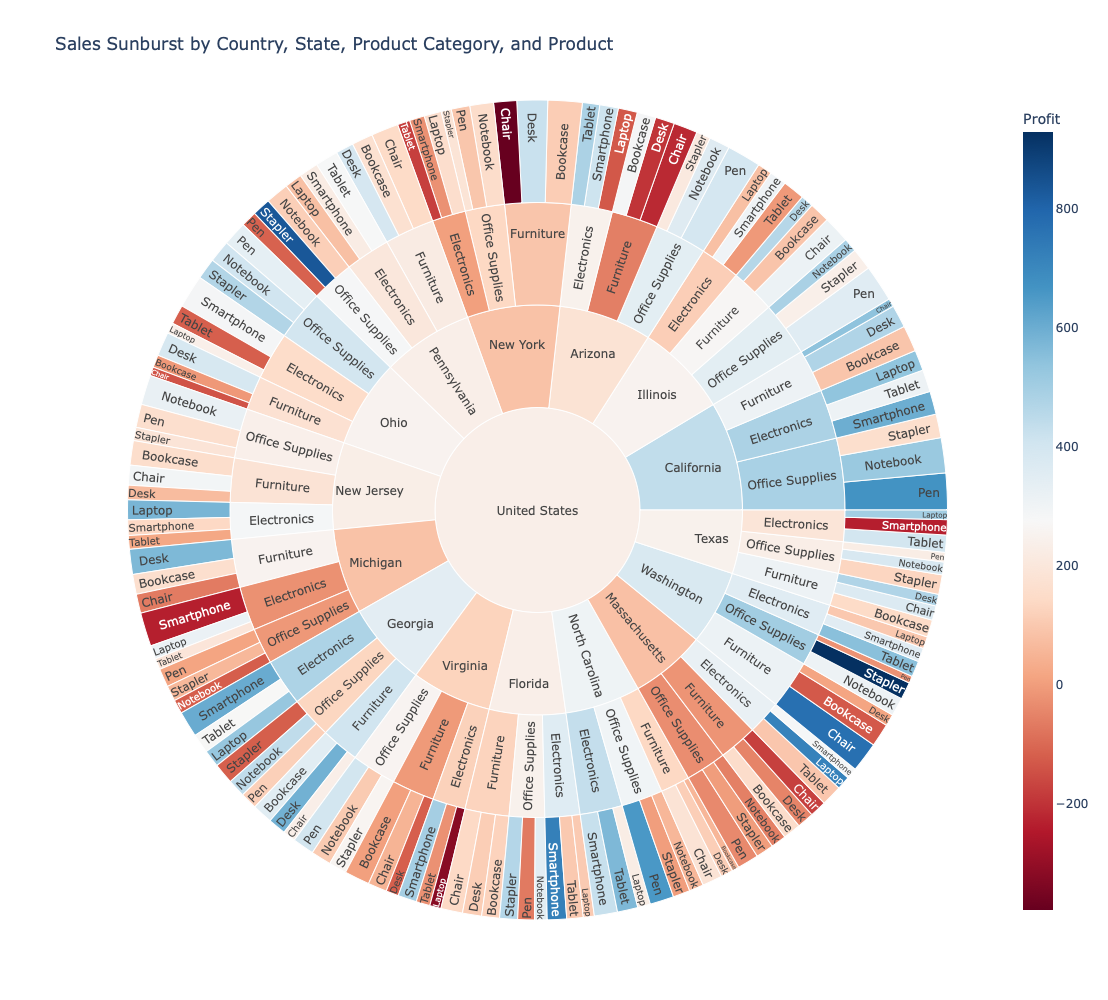

In [266]:
fig = px.sunburst(
    df,
    path=['Country', 'State', 'Product Category', 'Product Name'],  # hierarchy
    values='Sales',
    color='Profit',  
    hover_data=['Sales', 'Profit'],
    title='Sales Sunburst by Country, State, Product Category, and Product',
    width = 900,
    height =1000,
    color_continuous_scale='RdBu'
)

fig.show()

### Execise 1

Create a pie chart of revenues for product. Change tyour chart to Donut and sunburst. 

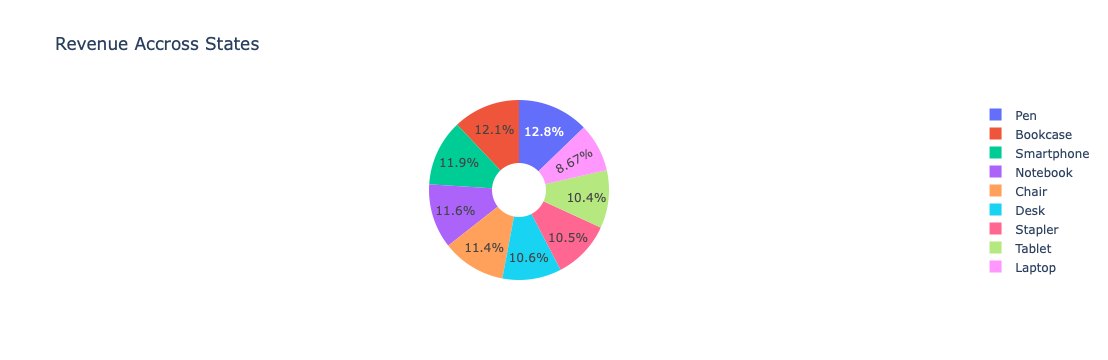

In [8]:
# Write your code here
fig = px.pie (df, values='Revenue', names = 'Product Name', hole = 0.3, title = 'Revenue Accross States')

fig.show()

### 3.4 Scatter Plot

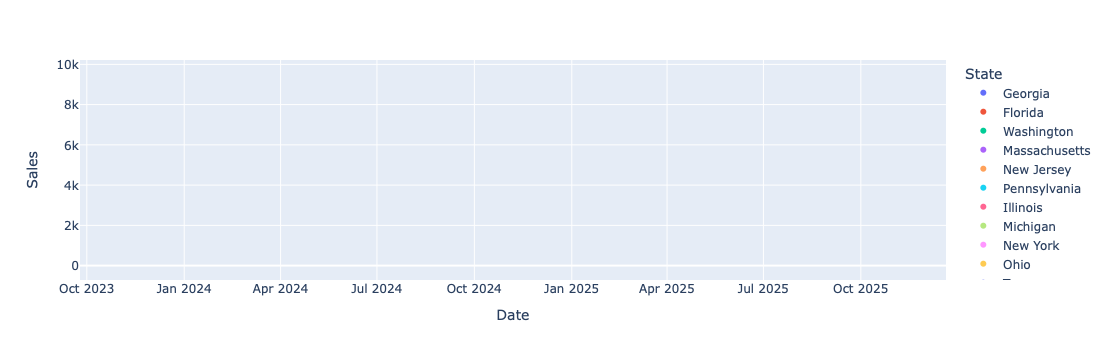

In [227]:
fig = px.scatter(df, x="Date", y="Sales", color="State")
fig.show()

That is not very informative. Let filter down to only a few states and a smaller time horizon. 

In [10]:
states_to_plot = ["California", "Texas"] 

df1 = df[
    (df["State"].isin(states_to_plot)) &
    (df["Date"] >= "2020-01-01")
]

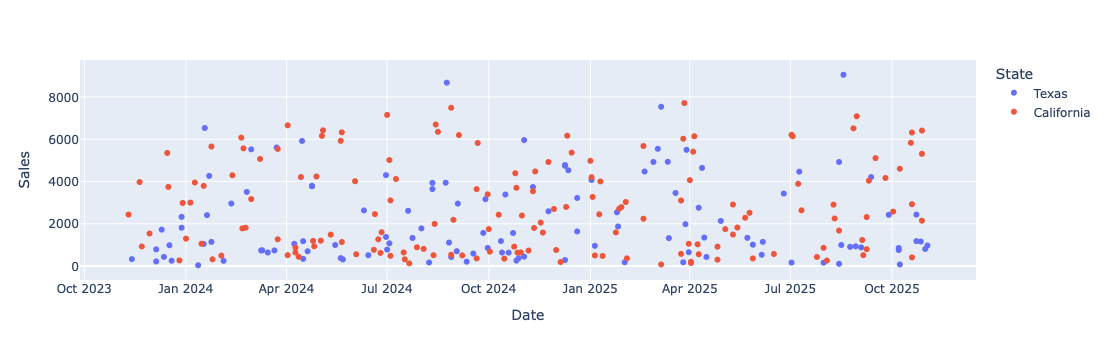

In [229]:
fig = px.scatter(df1, x='Date', y='Sales', color='State')
fig.show()

Lets add a line of best fit

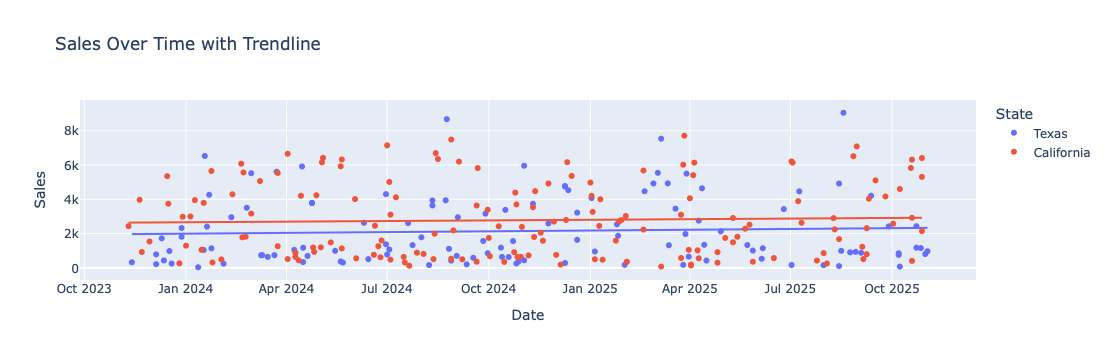

In [230]:
fig = px.scatter(df1, x='Date', y='Sales', color='State', trendline='ols',
    title="Sales Over Time with Trendline"
)

fig.show()


### 3.5 Line Plots

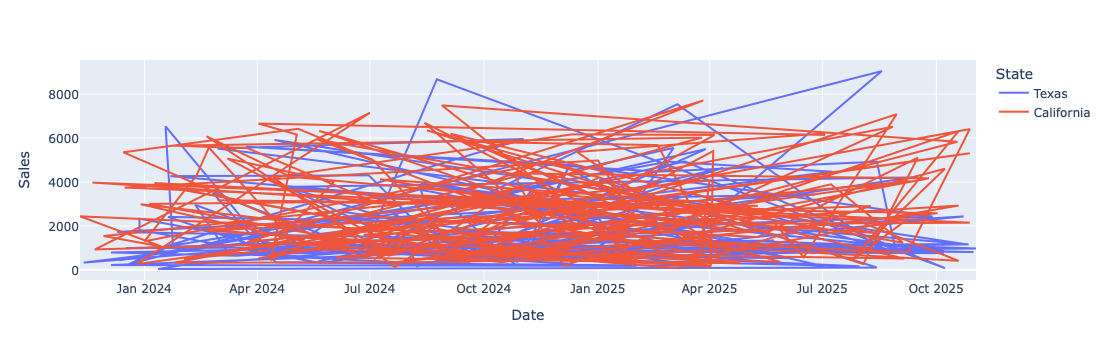

In [231]:
fig = px.line(df1, x='Date', y='Sales', color='State')
fig.show()

Oops, that is too missy becasue data is not sorted by Date. Lets do that first and then plot it

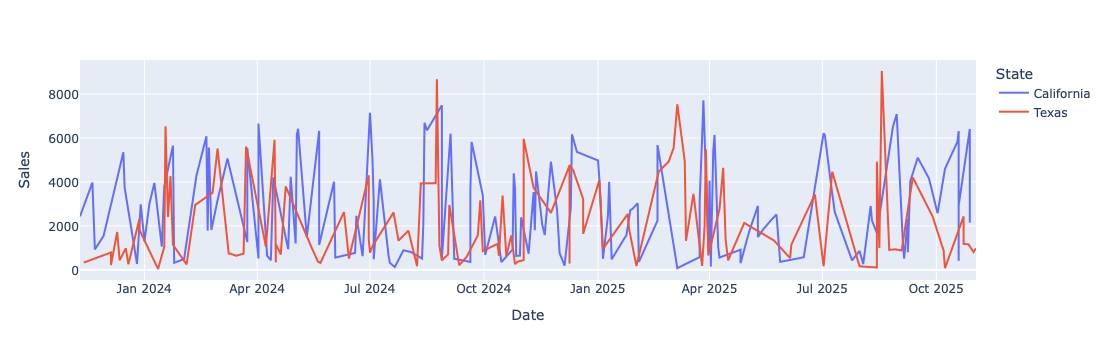

In [11]:
df1=df1.sort_values(by='Date')

fig = px.line(df1, x='Date', y='Sales', color='State')
fig.show()

### 3.6 Bar Plots

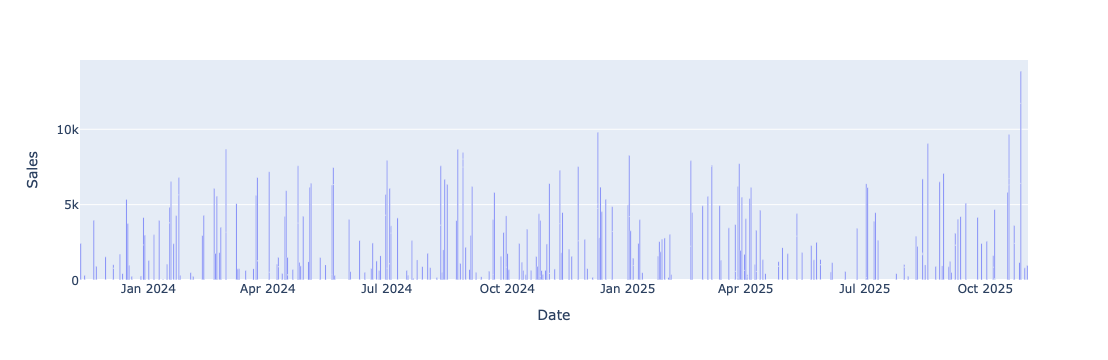

In [12]:
fig = px.bar(df1, x='Date', y='Sales')
fig.show()

Again too much for one chart to deliver meaningful information. Lets filter it down

In [13]:
states_dates_to_plot = ["Texas"] 

df2 = df[
    (df["State"].isin(states_to_plot)) &
    (df["Date"] >= "2025-01-01") & (df["Date"] <= "2025-03-31")
]

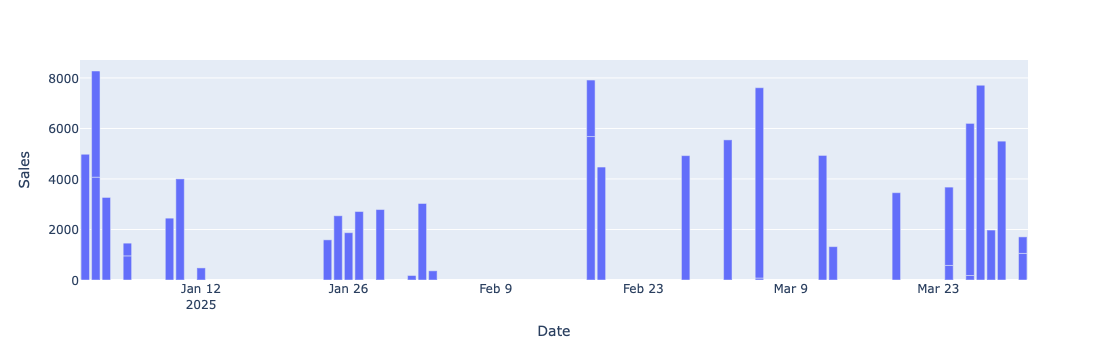

In [14]:
fig = px.bar(df2, x='Date', y='Sales')
fig.show()

### 3.7 Stacked Bar Plots

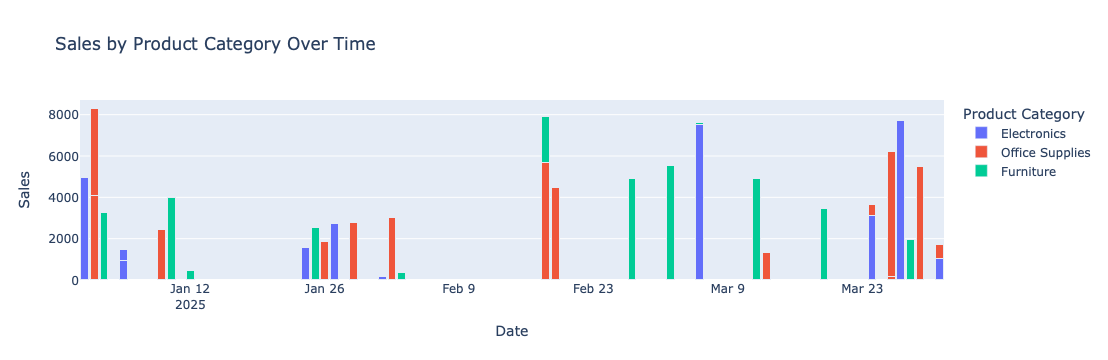

In [15]:
fig = px.bar(
    df2,
    x='Date',
    y='Sales',
    color='Product Category',  
    title="Sales by Product Category Over Time"
)

fig.update_layout(barmode='stack')  

fig.show()


### 3.8 Histogram

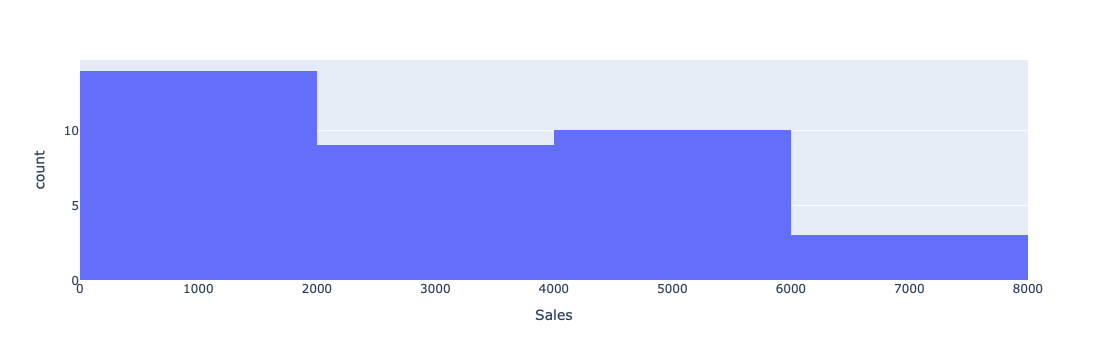

In [237]:
fig = px.histogram(df2, x ='Sales')
fig.show()

### 3.9 Box plots

Lets compare sales distribution for two States: Texas and Colifornia

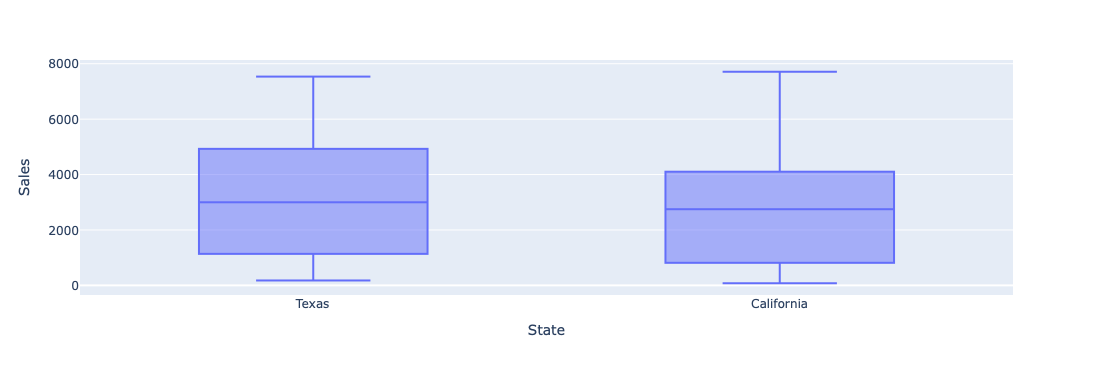

In [238]:
fig = px.box(df2, x='State', y='Sales')
fig.show()

Lets change the color of the boxes

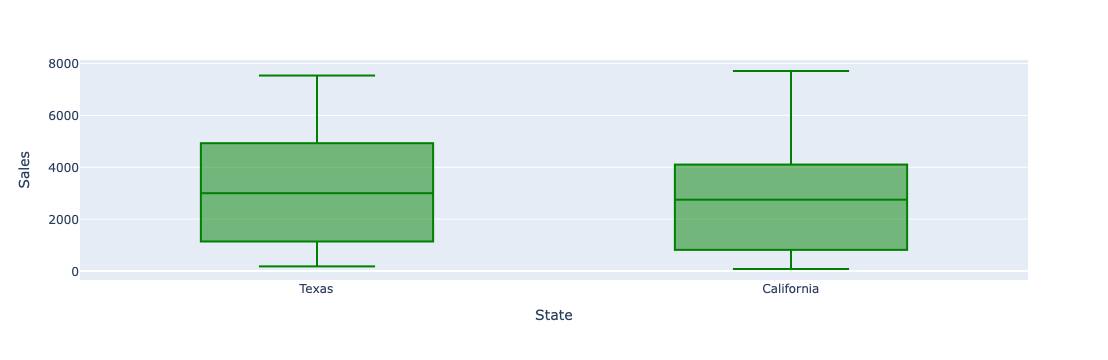

In [239]:
fig.update_traces(marker_color="Green")

Or, better to have different colors for different states

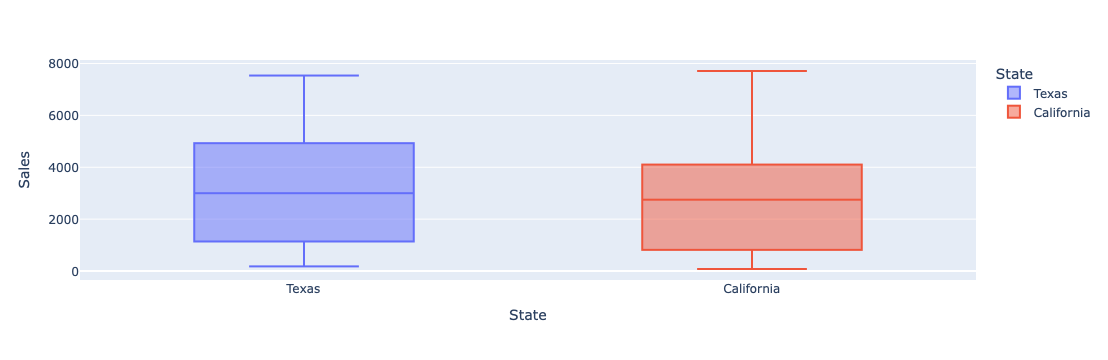

In [240]:
fig = px.box(df2, x='State', y='Sales', color='State')
fig.show()

Finally, lets update the figure to add some necessary details

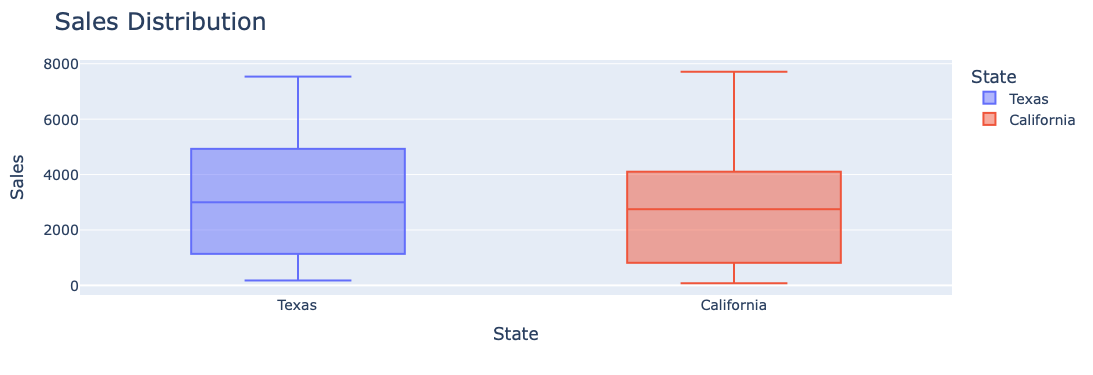

In [241]:
fig.update_layout(
    title = 'Sales Distribution',
    title_font_size=24,
    xaxis_title="State",
    yaxis_title="Sales",
    font=dict(size=14)
)

### 3.10 Violin Plot

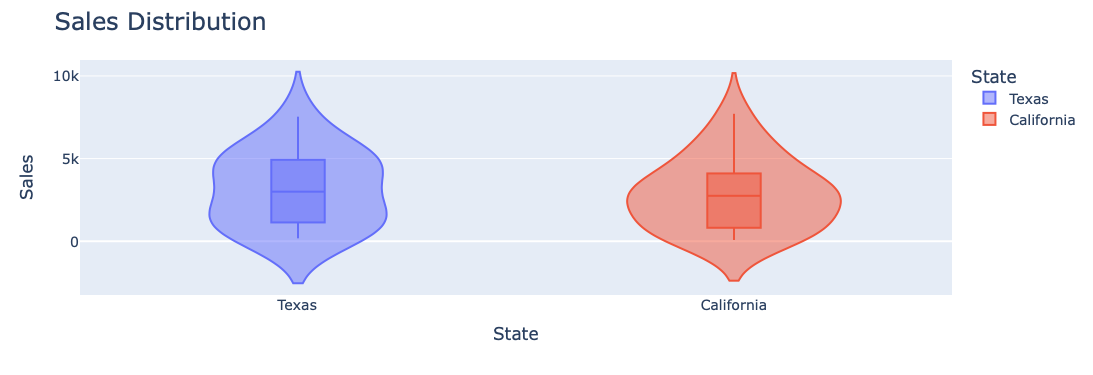

In [242]:
fig = px.violin(df2, x='State', y='Sales', color='State', box=True)

fig.update_layout(
    title = 'Sales Distribution',
    title_font_size=24,
    xaxis_title="State",
    yaxis_title="Sales",
    font=dict(size=14)
)
fig.show()

### Exercise 2

Create a Scatter plot to show how prices change with quantity sold. Add a line chart as well.

In [269]:
# Write your code here 


## 4. Plotly Graph Objects Basics

In [17]:
import plotly.graph_objects as go

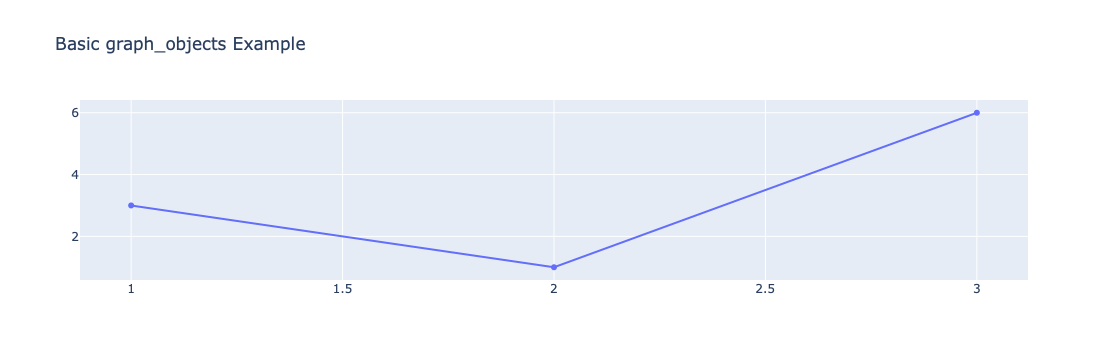

In [18]:
fig = go.Figure() #The main container for a plot.
fig.add_trace(go.Scatter(x=[1,2,3], y=[3,1,6], mode='lines+markers'))  #Each trace is a plot of data.
fig.update_layout(title="Basic graph_objects Example") #Controls figure appearance: axes, titles, font, legend.
#fig.update_traces(marker=dict(size=10, color='red'), line=dict(width=3, dash='dash')) # Update trace properties
fig.show() 

### Adding Sliders (Drop-down Menus) to Switch Traces

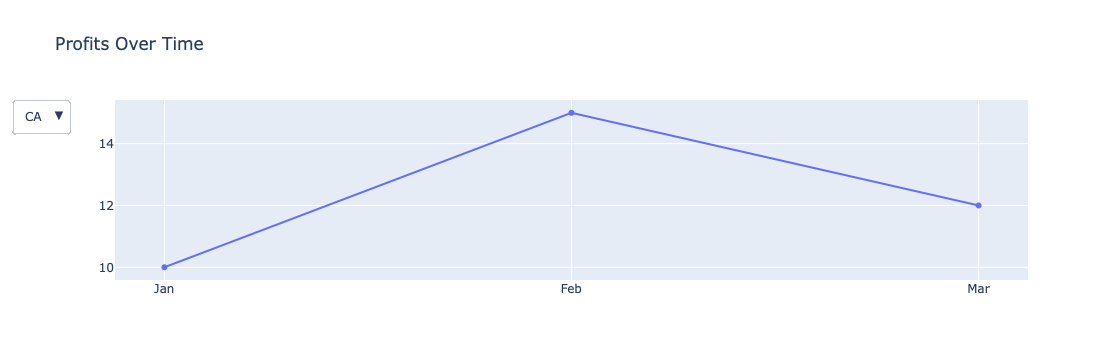

In [19]:
import plotly.graph_objects as go

# Sample data
dates = ["Jan", "Feb", "Mar"]
profits_CA = [10, 15, 12]
profits_NY = [7, 9, 11]
profits_TX = [5, 8, 6]

fig = go.Figure()

# Adding traces, i.e, three plots
fig.add_trace(go.Scatter(x=dates, y=profits_CA, mode="lines+markers", name="CA", visible=True))
fig.add_trace(go.Scatter(x=dates, y=profits_NY, mode="lines+markers", name="NY", visible=False))
fig.add_trace(go.Scatter(x=dates, y=profits_TX, mode="lines+markers", name="TX", visible=False))

# Lets add a dropdown menu to show each state
fig.update_layout(
    updatemenus=[dict(
        buttons=[
            dict(label="CA", method="update", args=[{"visible": [True, False, False]}]),
            dict(label="NY", method="update", args=[{"visible": [False, True, False]}]),
            dict(label="TX", method="update", args=[{"visible": [False, False, True]}]),
        ],
        direction="down",
        showactive=True
    )],
    title="Profits Over Time"
)

fig.show()

Lets combine various charts and create a drop down menue to each show each when clicked

In [22]:
# Filter and sort the data to a smaller subset

df["Date"] = pd.to_datetime(df["Date"])

states_to_plot = ["Texas", "Pennsylvania", "California"]

df2 = df[
    (df["State"].isin(states_to_plot)) &
    (df["Date"] >= "2025-01-01") & (df["Date"] <= "2025-02-15")
].sort_values(['State', 'Date'])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




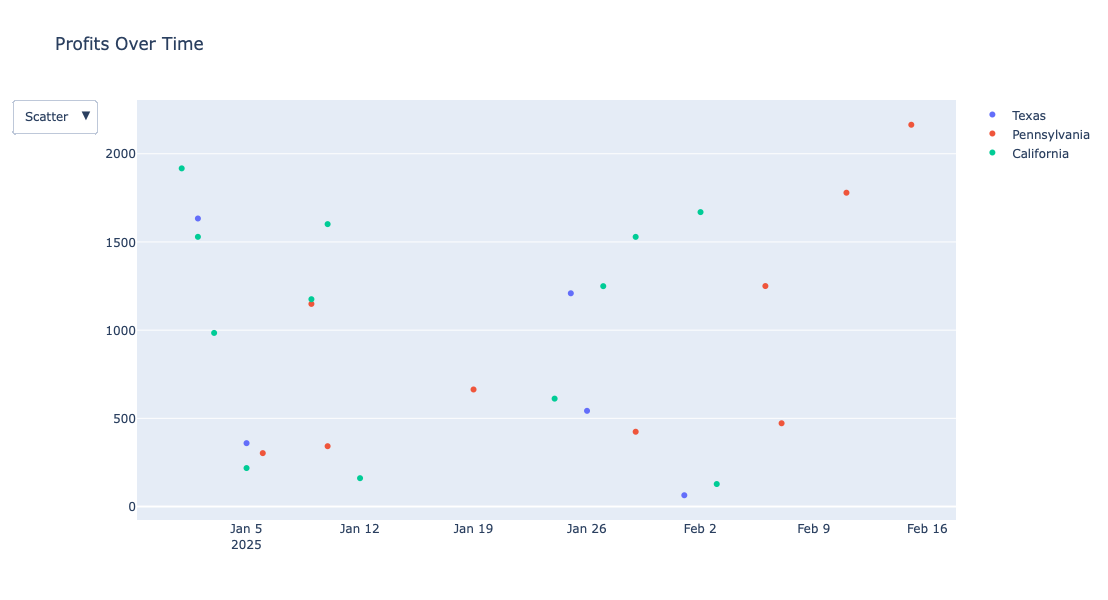

In [23]:
fig = go.Figure()

# Scatter per state
for state in states_to_plot:
    df_state = df2[df2['State'] == state]
    fig.add_trace(go.Scatter(
        x=df_state['Date'],
        y=df_state['Profits'],
        mode='markers',
        name=f"{state}",
        visible=True  # show all scatter traces by default
    ))

# Bar per state
for state in states_to_plot:
    df_state = df2[df2['State'] == state]
    fig.add_trace(go.Bar(
        x=df_state['Date'],
        y=df_state['Profits'],
        name=f"{state}",
        visible=False
    ))

# Pie chart
fig.add_trace(go.Pie(
    labels=df2['State'],
    values=df2['Profits'],
    name='Pie',
    visible=False
))

# Line per state
for state in states_to_plot:
    df_state = df2[df2['State'] == state]
    fig.add_trace(go.Line(
        x=df_state['Date'],
        y=df_state['Profits'],
        mode='lines+markers',
        name=f"{state}",
        visible=False
    ))

# --- Dropdown buttons ---
fig.update_layout(
    updatemenus=[dict(
        buttons=[
            dict(
                label="Scatter",
                method="update",
                args=[{"visible": [True]*3 + [False]*3 + [False] + [False]*3},
                      {"xaxis": {"visible": True}, "yaxis": {"visible": True}}]
            ),
            dict(
                label="Bar",
                method="update",
                args=[{"visible": [False]*3 + [True]*3 + [False] + [False]*3},
                      {"xaxis": {"visible": True}, "yaxis": {"visible": True}}]
            ),
            dict(
                label="Pie",
                method="update",
                args=[{"visible": [False]*6 + [True] + [False]*3},
                      {"xaxis": {"visible": False}, "yaxis": {"visible": False}}]
            ),
            dict(
                label="Line",
                method="update",
                args=[{"visible": [False]*6 + [False] + [True]*3},
                      {"xaxis": {"visible": True}, "yaxis": {"visible": True}}]
            ),
        ],
        direction="down",
        showactive=True
    )],
    title="Profits Over Time",
    height=600,
    width=900
)

fig.show()

## 5. Choropleth Map
A choropleth map is a type of map that uses color to represent data values across geographic regions. Each region (e.g., country, state, or county) is colored according to a numeric variable, making it easy to visualize spatial patterns.

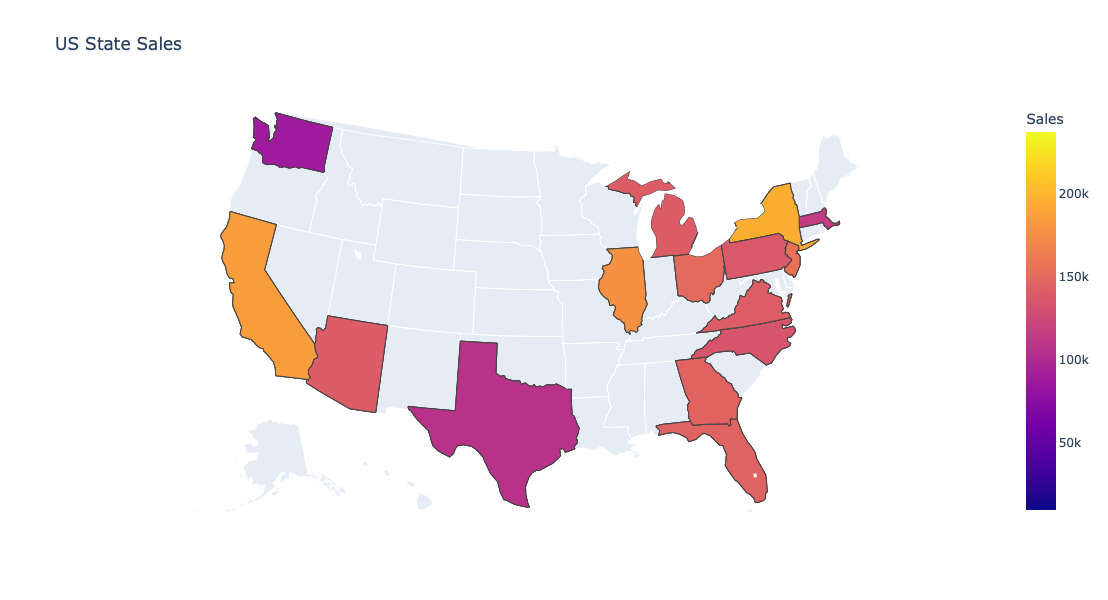

In [27]:
# Since we have multiples sales of multiple product for each state, we aggregate them to get a single sales figure for each state and year
state_sales = df.groupby(['StateCode','Year']).agg({'Sales':'sum','Profit':'sum'}).reset_index()

# Creating choropleth
fig = px.choropleth(
    state_sales,
    locations='StateCode',       
    locationmode='USA-states',
    color='Sales',                
    scope='usa',
    title='US State Sales'
)

fig.update_layout(height=600, width=1000)
fig.show()

We can add a year slider as well to visualize changes over time as well in the same plot

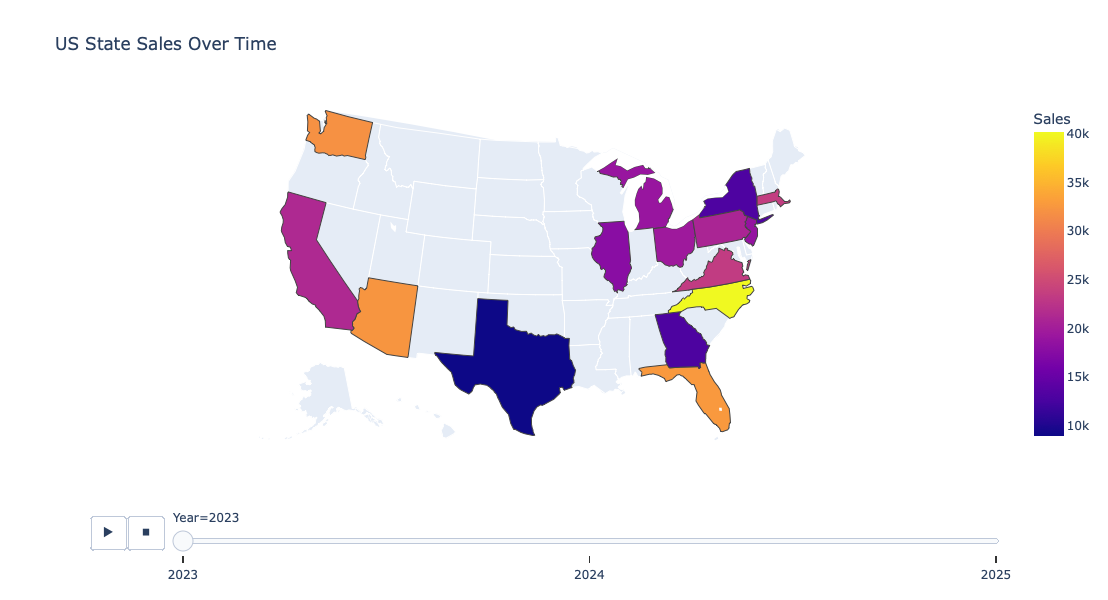

In [26]:
fig = px.choropleth(
    state_sales,
    locations='StateCode',       
    locationmode='USA-states',
    color='Sales',                
    scope='usa',
    animation_frame='Year',       
    title='US State Sales Over Time'
)

fig.update_layout(height=600, width=1000)
fig.show()

### Exercise 3

Create a Choropleth of Revenues accross State

<!--< div class="alert alert-block" style="margin-top: 20px; background-color: purple; color: white;">
-->
## Author

<a href="https://sites.google.com/view/mirwaisparsa/home" target="_blank">Mirwais Parsa | Seton Hill University</a>

## <h3 align="center"> © The Author. All Rights Reserved. <h3/>